In [0]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


# In[5]:


import keras


# In[61]:


# Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout, Activation
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(1)     

import matplotlib.pyplot as plt

In [0]:
#TEST_NAME = "KMeans"
TEST_NAME = "PageRank"
#TEST_NAME = "SGD"

#plt.style.use('ggplot')

def plot_history(history):
    #acc = history.history['r2_score_other']
    #val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)

    #plt.figure(figsize=(12, 5))
    #plt.subplot(1, 2, 1)
    #plt.plot(x, acc, 'b', label='Training r2_score')
    #plt.plot(x, val_acc, 'r', label='Validation acc')
    #plt.title('Training and validation accuracy')
    #plt.legend()
    #plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


# In[42]:

def add_context(data_df, context = 0):

    L = len(data_df)
    context_data = []
    row_1 = pd.DataFrame(data_df.iloc[0])
    #pad data with data[0] context times
    data = pd.concat([row_1]*context + [data_df])
    data = data_df.to_numpy()
    cols = list(data_df.columns)

    for fi in range(context, L):
        frame = data[fi-context:fi+1].flatten()
        context_data.append(frame)
    return pd.DataFrame(context_data, columns = cols*(context+1))

def read_dataset(filename):
    dataset = pd.read_csv(filename)
    df_cols = list(dataset.columns)
    dataset = scaler.fit_transform(dataset)
    dataset = pd.DataFrame(dataset, columns = df_cols)
    return dataset

def get_data_labels(df, context = 0):
    label = df['flow_size'][:-context]
    df = add_context(df, context)
    df.iloc[:, -1] = 0
    #add context to labels
    return df, label



# # Neural Network


#from keras import optimizers
#adam = optimizers.Adam(lr=0.9)


# In[90]:


#r2 score used in paper. 1 is best. -1 is bad.

def r2_score_other(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


#from https://stackoverflow.com/questions/45250100/kerasregressor-coefficient-of-determination-r2-score

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_df = read_dataset(TEST_NAME+'_training.csv')
test_df = read_dataset(TEST_NAME+'_test.csv')
validation_df = read_dataset(TEST_NAME+'_validation.csv')

context = 1

train_x, train_y = get_data_labels(train_df, context)
test_x, test_y = get_data_labels(test_df, context)
validation_x, validation_y = get_data_labels(validation_df, context)
#val = (val_x, val_y)

In [106]:
#train_x.head()

,time,flow_frequency,agg_net_out,agg_net_in,agg_net_out_per_machine,agg_net_in_per_machine,machine,flow_size,time,flow_frequency,agg_net_out,agg_net_in,agg_net_out_per_machine,agg_net_in_per_machine,machine,flow_size,time,flow_frequency,agg_net_out,agg_net_in,agg_net_out_per_machine,agg_net_in_per_machine,machine,flow_size,time,flow_frequency,agg_net_out,agg_net_in,agg_net_out_per_machine,agg_net_in_per_machine,machine,flow_size,time,flow_frequency,agg_net_out,agg_net_in,agg_net_out_per_machine,agg_net_in_per_machine,machine,flow_size,time,flow_frequency,agg_net_out,agg_net_in,agg_net_out_per_machine,agg_net_in_per_machine,machine,flow_size
0,0.058482,0.065067,0.000003,6.937512e-08,0.000003,6.955599e-08,0.666667,9.449852e-07,0.065533,0.009067,0.000007,0.000002,0.000007,0.000002,0.666667,2.836602e-06,0.066985,0.000800,0.000015,0.000004,0.000015,0.000004,0.666667,6.191793e-06,0.068022,0.001333,0.000017,0.000004,0.000017,0.000004,0.666667,8.099873e-07,0.069266,0.000800,0.000030,0.000005,0.000030,0.000005,0.666667,0.000012,0.070510,0.000533,0.000069,0.000066,0.000070,0.000066,0.666667,0.0
1,0.065533,0.009067,0.000007,2.126614e-06,0.000007,2.132159e-06,0.666667,2.836602e-06,0.066985,0.000800,0.000015,0.000004,0.000015,0.000004,0.666667,6.191793e-06,0.068022,0.001333,0.000017,0.000004,0.000017,0.000004,0.666667,8.099873e-07,0.069266,0.000800,0.000030,0.000005,0.000030,0.000005,0.666667,1.170037e-05,0.070510,0.000533,0.000069,0.000066,0.000070,0.000066,0.666667,0.000039,0.072377,0.001867,0.000075,0.000069,0.000076,0.000069,0.666667,0.0
2,0.066985,0.000800,0.000015,3.587494e-06,0.000015,3.596847e-06,0.666667,6.191793e-06,0.068022,0.001333,0.000017,0.000004,0.000017,0.000004,0.666667,8.099873e-07,0.069266,0.000800,0.000030,0.000005,0.000030,0.000005,0.666667,1.170037e-05,0.070510,0.000533,0.000069,0.000066,0.000070,0.000066,0.666667,3.875427e-05,0.072377,0.001867,0.000075,0.000069,0.000076,0.000069,0.666667,0.000004,0.076109,0.097867,0.000081,0.000084,0.000000,0.000000,0.500000,0.0
3,0.068022,0.001333,0.000017,3.736917e-06,0.000017,3.746660e-06,0.666667,8.099873e-07,0.069266,0.000800,0.000030,0.000005,0.000030,0.000005,0.666667,1.170037e-05,0.070510,0.000533,0.000069,0.000066,0.000070,0.000066,0.666667,3.875427e-05,0.072377,0.001867,0.000075,0.000069,0.000076,0.000069,0.666667,4.211275e-06,0.076109,0.097867,0.000081,0.000084,0.000000,0.000000,0.500000,0.000004,0.078183,0.000533,0.000101,0.001455,0.000021,0.001374,0.500000,0.0
4,0.069266,0.000800,0.000030,5.315201e-06,0.000030,5.329059e-06,0.666667,1.170037e-05,0.070510,0.000533,0.000069,0.000066,0.000070,0.000066,0.666667,3.875427e-05,0.072377,0.001867,0.000075,0.000069,0.000076,0.000069,0.666667,4.211275e-06,0.076109,0.097867,0.000081,0.000084,0.000000,0.000000,0.500000,4.026888e-06,0.078183,0.000533,0.000101,0.001455,0.000021,0.001374,0.500000,0.000020,0.087723,0.000533,0.000208,0.023754,0.000128,0.023731,0.500000,0.0


In [0]:
#define callback for early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50)

#define callback for saving best model
best_model = ModelCheckpoint('nn_model_PageRank.h5', monitor='val_loss',mode='min')# some code from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

Train on 54645 samples, validate on 15694 samples
Epoch 1/250
 - 6s - loss: 0.0100 - val_loss: 0.0023
Epoch 2/250
 - 6s - loss: 0.0020 - val_loss: 0.0023
Epoch 3/250
 - 6s - loss: 0.0020 - val_loss: 0.0023
Epoch 4/250
 - 6s - loss: 0.0018 - val_loss: 0.0014
Epoch 5/250
 - 6s - loss: 0.0011 - val_loss: 0.0013
Epoch 6/250
 - 6s - loss: 0.0010 - val_loss: 0.0012
Epoch 7/250
 - 6s - loss: 9.7664e-04 - val_loss: 0.0011
Epoch 8/250
 - 6s - loss: 9.2993e-04 - val_loss: 0.0011
Epoch 9/250
 - 6s - loss: 9.0760e-04 - val_loss: 0.0010
Epoch 10/250
 - 6s - loss: 8.8151e-04 - val_loss: 9.6267e-04
Epoch 11/250
 - 6s - loss: 8.7005e-04 - val_loss: 9.7475e-04
Epoch 12/250
 - 6s - loss: 8.6207e-04 - val_loss: 9.3355e-04
Epoch 13/250
 - 6s - loss: 8.5650e-04 - val_loss: 9.3659e-04
Epoch 14/250
 - 6s - loss: 8.4672e-04 - val_loss: 9.2914e-04
Epoch 15/250
 - 6s - loss: 8.4035e-04 - val_loss: 9.3467e-04
Epoch 16/250
 - 6s - loss: 8.3076e-04 - val_loss: 9.1751e-04
Epoch 17/250
 - 6s - loss: 8.2611e-04 - val

0.00019220800964338237

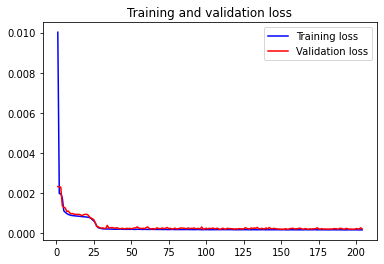

In [104]:
# In[102]:

'''
model = Sequential()
model.add(Dense(5, input_dim=train_x.shape[1],activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics = [r2_score_other])
model.fit(train_x, train_y, epochs=250, batch_size=10)
'''

model = Sequential()
model.add(Dense(5, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_absolute_error', optimizer='adam')
history = model.fit(train_x, train_y, epochs=250, \
                      validation_data = (validation_x, validation_y), \
                      batch_size=10, verbose=2, callbacks = [early_stop, best_model])

#plot_history(history)

#error metric
model.evaluate(test_x, test_y)

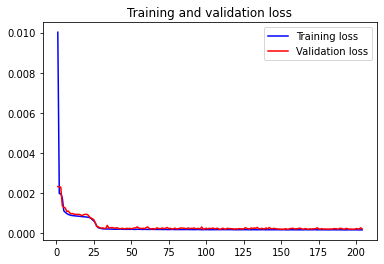

In [110]:
plot_history(history)

In [118]:
pred_y = model.predict(test_x)
score = r2_score(test_y, pred_y)
print(f'Test r2 score: {score}')


Test r2 score: 0.993490265129513
